# UM - Machine Learning Course

## Early Risk Diabetes Prediction

## Introduction

We will be using the [Early stage diabetes risk prediction dataset. Data Set
](https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.) dataset.

For each record in the dataset it is provided: 

- Age 1.20-65
- Sex 1. Male, 2.Female
- Polyuria 1.Yes, 2.No.
- Polydipsia 1.Yes, 2.No.
- sudden weight loss 1.Yes, 2.No.
- weakness 1.Yes, 2.No.
- Polyphagia 1.Yes, 2.No.
- Genital thrush 1.Yes, 2.No.
- visual blurring 1.Yes, 2.No.
- Itching 1.Yes, 2.No.
- Irritability 1.Yes, 2.No.
- delayed healing 1.Yes, 2.No.
- partial paresis 1.Yes, 2.No.
- muscle stiness 1.Yes, 2.No.
- Alopecia 1.Yes, 2.No.
- Obesity 1.Yes, 2.No.
- Class 1.Positive, 2.Negative.

More information about the features is available on the website above.

In [1]:
import os, seaborn as sns, pandas as pd, numpy as np, matplotlib.pyplot as plt
%matplotlib inline

os.chdir('/Users/salahkaf/Desktop/data') # Changing working directory
from colorsetup import colors, palette # Exists in the current directory
sns.set_palette(palette)

## Step 1

Import the data and do the following:

* Examine the data types--there are many columns, so it might be wise to use value counts
* Determine if the floating point values need to be scaled
* Determine the breakdown of each class
* Encode the attributes as integers

In [2]:
### BEGIN SOLUTION
filepath = 'diabetes_data_upload.csv'
dataframe = pd.read_csv(filepath)

In [3]:
dataframe.dtypes.value_counts()

object    16
int64      1
dtype: int64

In [4]:
dataframe.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [5]:
dataframe['class'].value_counts() # differnt types of error metrics are going to work better for different types of dataets. Whether they're balanced or unbalanced.
# In this case, they are not perfectly balanced

Positive    320
Negative    200
Name: class, dtype: int64

Use `LabelEncoder` to fit_transform the categorical columns into integers

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in dataframe.columns:
    dataframe[i] = le.fit_transform(dataframe[i])

In [7]:
dataframe.dtypes.value_counts()

int64    17
dtype: int64

In [8]:
dataframe.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [9]:
# apply normalization techniques by Column 1 (The rest would not need as [1,0] will results the same [1,0])
column = 'Age'
dataframe[column] = (dataframe[column] - dataframe[column].min())/ (dataframe[column].max() - dataframe[column].min())    

In [10]:
dataframe.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0.32,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.68,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,0.34,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0.42,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.72,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


## Step 2

* Calculate the correlations between the dependent variables.
* Create a histogram of the correlation values
* Identify those that are most correlated (either positively or negatively).

In [11]:
### BEGIN SOLUTION
# Calculate the correlation values
feature_cols = dataframe.columns[:-1]
corr_values = dataframe[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values) # The lower triangle

# Make the unused values NaNs
corr_array = np.array(corr_values) # Changing the df to an array
corr_array[tril_index] = np.nan # Assigning the lower traingle to nan
    
# Recreate Pandas correlation data frame
corr_values = pd.DataFrame(corr_array,columns = corr_values.columns, index= corr_values.index)

# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()
corr_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   feature1         120 non-null    object 
 1   feature2         120 non-null    object 
 2   correlation      120 non-null    float64
 3   abs_correlation  120 non-null    float64
dtypes: float64(2), object(2)
memory usage: 3.9+ KB


A histogram of the absolute value correlations.

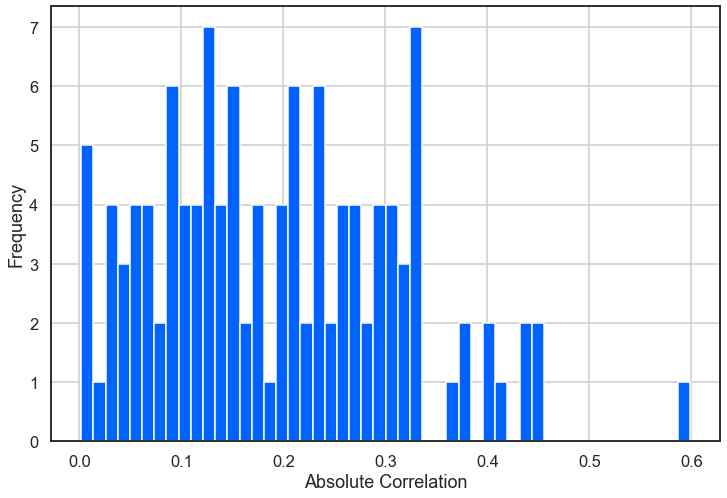

In [12]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [13]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).head()
# This indicates that there is no high multicollinearity

,feature1,feature2,correlation,abs_correlation
29,Polyuria,Polydipsia,0.598609,0.598609
100,Itching,delayed healing,0.453316,0.453316
30,Polyuria,sudden weight loss,0.447207,0.447207
50,Polydipsia,partial paresis,0.442249,0.442249
38,Polyuria,partial paresis,0.441664,0.441664


## Step 3

* Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
* Regardless of methods used to split the data, compare the ratio of classes in both the train and test splits.


In [14]:
### BEGIN SOLUTION
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

# We use 'next' to get the arrays from the generator object.
train_idx, test_idx = next(strat_shuf_split.split(dataframe[feature_cols], dataframe['class']))
# next(strat_shuf_split.split(dataframe[feature_cols], dataframe['class']))

In [15]:
# Create the train and test sets
X_train = dataframe.loc[train_idx, feature_cols] # loc[index,column]
y_train = dataframe.loc[train_idx, 'class']

X_test  = dataframe.loc[test_idx, feature_cols]
y_test  = dataframe.loc[test_idx, 'class']

In [16]:
y_train.value_counts()

1    224
0    140
Name: class, dtype: int64

In [17]:
y_train.value_counts(normalize=True) # Normalize gives us the proportial rather than the true count.

1    0.615385
0    0.384615
Name: class, dtype: float64

In [18]:
y_test.value_counts()

1    96
0    60
Name: class, dtype: int64

In [19]:
y_test.value_counts(normalize=True)
### END SOLUTION

1    0.615385
0    0.384615
Name: class, dtype: float64

## Step 4

* Fit a logistic regression model without any regularization using all of the features.
* Using cross validation to determine the hyperparameters, fit models using L1, and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.

In [20]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

# The solver method is one against the rest. So in this case it will run 6 times for each one of the six different classes.

In [21]:
from sklearn.linear_model import LogisticRegressionCV # Cross validation allow us to loop through many different hyperparameters

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)
# Cs is the inverse of lambda (it is going to check across against 10 different default values of that c value.)

In [22]:
# L2 regularized logistic regression ~ Generally speaking, L2 tends to run a bit faster
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)
### END SOLUTION

## Step 6

* Predict and store the class for each model.
* Store the probability for the predicted class for each model. 

In [23]:
### BEGIN SOLUTION
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

In [24]:
y_pred.head()

,lr,l1,l2
0,0,0,0
1,1,1,1
2,1,1,1
3,0,0,0
4,1,1,1


In [25]:
y_pred[y_pred['lr'] != y_pred['l1']] # To check for different predicted outcomes

,lr,l1,l2
48,1,0,1
72,1,0,1
92,1,0,0


In [26]:
y_prob.head()
### END SOLUTION

,lr,l1,l2
0,0.947130,0.978135,0.968233
1,0.915506,0.984087,0.959489
2,0.999608,0.999988,0.999946
3,0.623979,0.645681,0.622876
4,0.998100,0.999856,0.999579


## Step 7

For each model, calculate the following error metrics: 

* Accuracy
* Precision
* Recall
* F-score
* Confusion Matrix

Decide how to combine the multi-class metrics into a single value for each model.

In [27]:
### BEGIN SOLUTION
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize # To do one-hot encoding

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1]),
              label_binarize(y_pred[lab], classes=[0,1]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [28]:
score(y_test, y_pred['lr'])[0] # Precision for our different lables
# For instance, for those who are predicted as class 1, the model  managed to predict all of them correctly.

array([0.87301587, 0.94623656])

In [29]:
score(y_test, y_pred['lr'])[1] # recall 

array([0.91666667, 0.91666667])

In [30]:
score(y_test, y_pred['lr'])[2] # F score

array([0.89430894, 0.93121693])

In [31]:
score(y_test, y_pred['lr'])[3] # Support

array([60, 96])

In [32]:
score(y_test,y_pred['lr'], average='weighted')
# Precision, Recall, F, Support

(0.9180747567844342, 0.9166666666666666, 0.9170215511678927, None)

In [33]:
metrics

,lr,l1,l2
precision,0.918075,0.914375,0.925167
recall,0.916667,0.910256,0.923077
fscore,0.917022,0.910946,0.923499
accuracy,0.916667,0.910256,0.923077
auc,0.916667,0.914583,0.925000


## Step 8

Display or plot the confusion matrix for each model.

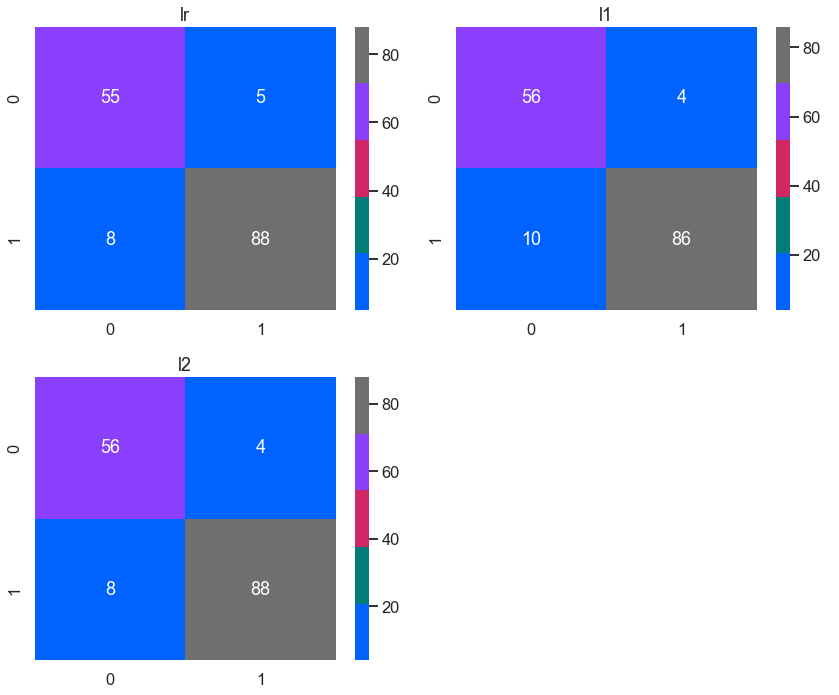

In [34]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d', cmap=colors);
    ax.set(title=lab);
    
plt.tight_layout()